In [1]:
import numpy as np
import matplotlib.pyplot as plt
import visual

# Aproximación

Aproximar $e$ hasta 6 dígitos decimales.

Para hacer esta aproximación, recordemos los siguientes tres resultados teóricos, véase [1] :

---
Si $p$ es una cantidad que deseamos aproximar mediante un número $q$, decimos que $q$ aproxima a $p$ hasta $k$ lugares decimales si la magnitud de la diferencia no es más grande que $5 \times 10^{-(k+1)}$, es decir: $\displaystyle |p - q| \leq 5 \times 10^{-(k+1)}$.

---
Si $|f^{(n+1)}(x)| \leq M$ en el intervalo $(a-x, a+x)$ entonces el residuo es

$\displaystyle
\boxed{R_n(x) \leq \frac{M(x-a)^{n+1}}{(n+1)!}}
$

---
Forma del Residuo de Lagrange:

$$
R_n(x) = \frac{f^{(n+1)}(\xi)}{(n+1)!}(x-a)^{n+1}
$$

---

Con lo anterior en mente, procedamos a realizar la aproximación.

Primero escribimos la serie de Taylor de la función $f(x)=e^x$ alrededor de $x=0$:

$\displaystyle
T_n(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \dots + \frac{x^n}{n!}
$

Usaremos el intervalo $(0,1)$ para acotar el residuo.

Sabemos que:
1. $e^0 = 1 = T_n(0)$
2. $e^1 = e \approx T_n(1)$
3. $e^\xi < e^x$ para $0 < \xi < x$

Usando la fórmula del residuo de Lagrange, primero debemos estimar $f^{(n+1)}(\xi) = e^\xi$. Hagamos la expansión de Taylor de primer orden alrededor de 0 junto con su residuo:

$\displaystyle
e^x  = T_1(x) + R_1(x) = 1 + x + \frac{e^\xi}{2!}x^2 
$

Dado que $e^\xi < e^x$ para $0 < \xi < x \leq 1$ entonces:

$\displaystyle
e^x  = 1 + x + \frac{e^\xi}{2!}x^2 < 1 + x + \frac{e^x}{2!}x^2 
\quad \Longrightarrow \quad 
e^x \leq 1 + x + \frac{e^x}{2!}x^2 \quad \text{para} \quad 0 \leq x \leq 1
$

de donde obtenemos:

$\displaystyle
\boxed{e^x \leq \frac{2 + 2x}{2 - x^2} \quad \text{para} \quad 0 \leq x \leq 1 }
$

Una gráfica de la función $\displaystyle \frac{2 + 2x}{2 - x^2}$ se puede ver en la siguiente figura:

In [ ]:
import matplotlib.pyplot as plt

xe = np.linspace(0,1,20) # Codominio de la función

# Graficamos la función
plt.plot(xe, (2 + 2*xe) / (2 - xe**2), label='$\dfrac{2 + 2*x}{2 - x^2}$')
plt.plot(xe, np.exp(xe), label='$e^x$')

# Configuración de la gráfica
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.show()

Observamos que $M = 4$ es una cota superior para $f^{(n+1)}(\xi) = e^\xi$ con $0 < \xi < 1$, por lo tanto el residuo es:

$\displaystyle
|R_n(x)| \leq \frac{M x^{n+1}}{(n+1)!} \leq \frac{4}{(n+1)!} \quad \text{para} \quad 0 \leq x \leq 1
$

Como se quiere aproximar con 6 dígitos decimales, entonces debemos encontrar una $n$ que satisfaga la siguiente condición: 

$\displaystyle
\frac{4}{(n+1)!} \leq 5 \times 10^{-7} 
$

Esto lo hacemos con el siguiente código:

In [ ]:
import math
def calc_n(M, k=1):
    """
    Calcula el grado n de la serie de Taylor necesaria para aproximar la
    función e^x hasta k digitos decimales.
    """
    n = 0
    v = 1.0
    while v > 5.0 * 10**(-(k+1)):
        v = M / math.factorial(n+1)
        n += 1
    return n

def Taylor_e(n):
    """
    Calcula el valor de e con un polinomio de Taylor de grado n
    """
    e = 0
    for i in range(0,n+1):
        e += 1 / math.factorial(i)
        print('Polinomio de grado {:3d}. Aproximación : {:2.10f}'.format(i,e))
    return e

In [ ]:
e_aprox = Taylor_e(calc_n(4,6))

In [ ]:
print('Aproximación final: {:2.10f}'.format(e_aprox))
print('Valor de numpy    : {:2.10f}'.format(np.exp(1)))
print('Error de la aprox : {:2.10f}'.format(np.fabs(e_aprox - np.exp(1))))

## Ejercicio 1

Aproximar $\pi$ hasta 10 dígitos decimales.

# Transferencia de calor

En invierno buscamos nuestra comodidad térmica aislando nuestros cuerpos al cubrirlos con gruesos abrigos, de este modo minimizamos el área superficial expuesta a temperaturas bajas. Pero en verano, intentamos minimizar la ganancia de calor por radiación al permanecer en lugares sombreados. De igual manera, si usamos una cuchara de metal para mover nuestros alimentos mientras los calentamos en la estufa, sentiremos la cuchara caliente después de unos minutos, y si no tenemos cuidado podemos quemarnos la mano debido a que los metales son buenos transmisores del calor. Lo que estamos describiendo con estos ejemplos son casos cotidianos de la **transferencia de calor**. 

En el siguiente video, observamos como una barra de metal es expuesta a una fuente de calor en su extremo izquierdo y se representa con colores el aumento de la temperatura en toda la barra:

<video src="../../Videos/02_Conduccion1D.mp4" width="320" controls></video>

¿Será posible usar las matemáticas, específicamente las Series de Taylor, para estudiar como se transfiere el calor en diferentes circunstancias?

Para responder esta pregunta veamos que son las Series de Taylor y posteriormente intentemos resolver un problema de transferencia de calor con esta herramienta matemática.

## Modelo matemático
Un modelo matemático que describe la conducción de calor es el siguiente:

$\displaystyle
\nabla \cdot \left( \kappa \nabla T \right) = -q
$

donde $\kappa$ representa la conductividad térmica y $q$ una fuente de energía calorífica.

Si quisieramos determinar la distribución de temperaturas en una barra de metal, con $\kappa$ = cte., usaríamos un modelo en una dimensión que se puede escribir como sigue:

$
\displaystyle
\kappa \frac{d^2 T}{d x^2} = -q
$

La barra tiene una temperatura $T_A$ en su extremo izquierdo y otra temperatura $T_B$ en su extremo derecho y además consideramos que $q$ = cte.

A continuación veremos como encontrar una solución, es decir una función $T(x)$, que me de la temperatura en cada posición $x$, usando dos estrategias basadas en Series de Taylor.

### Solución analítica
Es posible obtener una función $T(x)$ que describa la distribución de temperaturas a lo largo de dicha barra. Para ello vamos a escribir $T(x)$ en forma de una serie Taylor

$
\displaystyle
T_n(x) = \sum_{i=0}^n T^{(i)}(a)\frac{(x-a)^i}{i!} = \sum_{i=0}^n c_i (x-a)^i
$

donde $\displaystyle c_i = \frac{T^{(i)}(a)}{i!}$.

Definimos ahora una aproximación alrededor de $a = 0$ para $n = 2$ con lo que obtenemos:


$\displaystyle
T(x) = c_0 + c_1 *x + c_2 * x^2
$

Calculamos la primera y segunda derivadas de $T(x)$:

$
\begin{eqnarray}
\frac{d T(x)}{d x} & = & c_1 + 2 * c_2 * x \\
\frac{d^2 T(x)}{d x^2} & = & 2 * c_2 \\
\end{eqnarray}
$

Sustituyendo esta segunda derivada en la ecuación de conducción de calor obtenemos:

$
\displaystyle
\kappa (2 * c_2 ) = -q \Longrightarrow \boxed{c_2 = -\frac{q}{2 \kappa}}
$

Para obtener $c_0$ y $c_1$ hacemos uso de las condiciones de frontera en $T(x)$:

$\displaystyle
\begin{eqnarray}
\text{Extremo izquierdo: } T(x=0) & = & c_0 + c_1 * 0 + c_2 * 0^2 = T_A  \\
&\Longrightarrow& \boxed{c_0 = T_A} \\
\text{Extremo derecho: } T(x=L) & = & c_0 + c_1 * L + c_2 * L^2 = T_A + c_1 * L - \frac{q}{2 \kappa} * L^2 =
T_B \\
&\Longrightarrow& \boxed{c_1 = \left(T_B - T_A + \frac{q L^2}{2 \kappa}\right)\frac{1}{L}}
\end{eqnarray}
$

De esta manera tenemos que la solución final es:

$\displaystyle
T(x) = T_A + \left(T_B - T_A + \frac{q L^2}{2 \kappa}\right)\frac{1}{L} x - \frac{q}{2 \kappa} x^2 =
\boxed{\left(\frac{T_B - T_A}{L} + \frac{q}{2\kappa} \left(L - x\right) \right)x + T_A}
$

Implementamos esta solución en una función de Python:

In [ ]:
def temperatura(x, TA, TB, q, L, k):
    """
    Calcula la temperatura usando la fórmula obtenida con Series de Taylor.
    """
    return ((TB - TA)/L + q /(2*k) * (L - x) ) * x + TA

#### Ejemplo 1

Este ejemplo representa una barra aislada con temperaturas $T_A$ y $T_B$ en sus extremos. 

Datos del problema:
- $\kappa = 1000$ [W /m $^o$C]
- $L = 0.5$ [m]
- $T_A = 100$ [$^o$C]
- $T_B = 500$ [$^o$C]
- $q = 0$

In [ ]:
k = 1000
L = 0.5
TA = 100
TB = 500
q = 0

# Calculamos la temperatura con la solución analítica
x = np.linspace(0, L, 100)
T = temperatura(x, TA, TB, q, L, k)

# Definimos algunos parámetros para la gráfica
plt.title('Transferencia de calor')
plt.xlabel('$x$ [m]')
plt.ylabel('$T$ [$^oC$]')

# Realizamos la gráfica con una línea y puntos que tienen un color 
# dependiendo de su temperatura
plt.plot(x, T, color='k', lw =1.0)
s = plt.scatter(x, T, c=T, cmap='jet', alpha=0.5)
plt.colorbar(s) # Se muestra una barra de color 
plt.show()

#### Ejemplo 2

Este ejemplo representa una barra que en cada uno de sus puntos recibe un flujo de calor $q$ y con temperaturas $T_A$ y $T_B$ en sus extremos. Véase [2].

Datos:
- $\kappa = 0.5$ [W /m $^o$C]
- $L = 0.02$ [m]
- $T_A = 100$ [$^o$C]
- $T_B = 200$ [$^o$C]
- $q = 10^6$ [W/m$^3$]

In [ ]:
# Datos del problema
k = 0.5
L = 0.02
TA = 100
TB = 200
q = 1e+6

# Calculamos la temperatura con la solución analítica
x = np.linspace(0,L,100)
T = temperatura(x, TA, TB, q, L, k)

# Definimos algunos parámetros para la gráfica
plt.title('Transferencia de calor')
plt.xlabel('$x$ [m]')
plt.ylabel('$T$ [$^oC$]')

# Realizamos la gráfica con una línea y puntos que tienen un color 
# dependiendo de su temperatura
plt.plot(x, T, color='k', lw=1.0)
s = plt.scatter(x, T, c=T, cmap='jet', alpha=0.5)
plt.colorbar() # Se muestra una barra de color 
plt.show()

### Solución numérica
Los ejemplos anteriores también se pueden resolver usando el método numérico conocido como diferencias finitas, el cual se obtiene también usando Series de Taylor. Veamos como:

#### Derivadas de primer orden
Supongamos que $u(x)$ es una función bien comportada con $n$ derivadas continuas.
Entonces podemos escribir la siguiente serie de Taylor alrededor de $x_0$:

$\displaystyle
u(x_0+h) = u(x_0) + u^\prime(x_0)h + \frac{u^{\prime\prime}(x_0)}{2!}h^2 + \dots + \frac{u^{(n)}(x_0)}{n!}h^n + R_n(x)$ 

donde $h = x-x_0$ y de aquí se tiene que $x = x_0 + h$. Si truncamos el polinomio de Taylor a primer orden tenemos:

$\displaystyle
u(x_0+h) = u(x_0) + u^\prime(x_0)h + R_1(x)$ 

Luego despejamos $u^\prime(x_0)$:

$\displaystyle
\begin{eqnarray}
\Longrightarrow u^\prime(x_0) & = & \frac{u(x_0+h) - u(x_0)}{h} - \frac{R_1(x)}{h} \\
\Longrightarrow u^\prime(x_0) & = & \frac{u(x_0+h) - u(x_0)}{h} - \frac{u^{(2)}(\xi) h^2 / 2!}{h} \\ 
\Longrightarrow u^\prime(x_0) & = & \frac{u(x_0+h) - u(x_0)}{h} - \frac{u^{(2)}(\xi)}{2} h\\
\Longrightarrow u^\prime(x_0) & = & \frac{u(x_0+h) - u(x_0)}{h} - \mathcal{O}(h)\\
\end{eqnarray}
$

Observaciones:
1. La última ecuación no es más que la definición de la derivada, hacia adelante:

$\displaystyle
u^\prime(x_0) = \lim_{h \rightarrow 0 } \frac{u(x_0+h) - u(x_0)}{h}
$

2. La expresión $\mathcal{O}(h)$ significa que el último término es de orden $h$.

3. Si eliminamos ese último término tendremos una aproximación de la derivada hacia adelante de orden $h$:

$\displaystyle
u^\prime(x_0) \approx \frac{u(x_0+h) - u(x_0)}{h}
$

#### Ejercicio
Mostrar que la aproximación de la derivada hacia atrás de orden $h$ se escribe como:

$\displaystyle
u^\prime(x_0) \approx \frac{u(x_0) - u(x_0-h)}{h}
$

**Hint**: Escriba la expansión en series de Taylor de $u(x_0-h)$ y despeje $u^\prime(x_0)$

#### Derivadas de segundo orden

Las expansiones en series de Taylor de $u(x_0 + h)$ y de $u(x_0 - h)$ son: 

$\displaystyle
u(x_0+h) = u(x_0) + u^\prime(x_0)h + \frac{u^{\prime\prime}(x_0)}{2!}h^2 + \frac{u^{\prime\prime\prime}(x_0)}{3!}h^3 + \dots + \frac{u^{(n)}(x_0)}{n!}h^n + R_n(x)
$ 

$\displaystyle
u(x_0-h) = u(x_0) - u^\prime(x_0)h + \frac{u^{\prime\prime}(x_0)}{2!}h^2 - \frac{u^{\prime\prime\prime}(x_0)}{3!}h^3 + \dots + \frac{u^{(n)}(x_0)}{n!}h^n + R_n(x)
$ 

Ahora sumamos a las dos ecuaciones para obtener:

$\displaystyle
u(x_0+h) + u(x_0-h) = 2u(x_0) + u^{\prime\prime}(x_0) h^2 + \frac{2 u^{(4)}(x_0)}{4!}h^4 + 
\frac{2 u^{(6)}(x_0)}{6!}h^6 + \dots + \mathcal{O}(h^{(n+1)})$ 

Observamos que todos los términos de orden impar se han eliminado, esto debido a que esta aproximación es simétrica y está centrada en $x_0$. Truncamos la serie hasta orden 4 y despejamos $u^{\prime\prime}(x_0)$ :

$\displaystyle
u^{\prime\prime}(x_0) = \frac{u(x_0-h) - 2u(x_0) +  u(x_0+h)}{h^2} + \mathcal{O}(h^2)$ 

Tenemos entonces una aproximación a la segunda derivada de orden $h^2$.

### Aproximación de la ecuación de calor
Usando la aproximación de la segunda derivada obtenida anteriormente, se puede escribir la  ecuación de calor
$
\displaystyle
\kappa \frac{d^2 T}{d x^2} = q
$
como sigue:

$$
\displaystyle
\begin{eqnarray}
\kappa \left( \frac{T(x_0-h) - 2T(x_0) +  T(x_0+h)}{h^2} \right) & = & q \\
\Longrightarrow T(x_0-h) - 2T(x_0) +  T(x_0+h) & = & \frac{q h^2}{\kappa}
\end{eqnarray}
$$

Lo que nos dice esta última ecuación es que se puede aproximar la temperatura en $x_0$ con un error de orden $\mathcal{O}(h^2)$. Entonces entre más pequeño sea el $h$ mejor es la aproximación. Para obtener una solución en toda la barra, se construye una ecuación como la anterior para cada punto de la barra donde se desea conocer la temperatura, véase el siguiente video:

<video src="../../Videos/03_Conduccion1D.mp4" width="320" controls></video>

Los puntos estarán equidistantes de tal manera que la distancia entre ellos, $h$, se puede disminuir agregando cada vez más puntos. Obsérvese también que hay dos puntos especiales en  los extremos de la barra, donde la temperatura es conocida (condiciones de frontera).
Si escribimos las ecuaciones para todos los puntos, digamos que tenemos $N$ puntos, entonces obtendremos un sistema lineal de ecuaciones como el siguiente:

$
\begin{eqnarray}
T_0 - 2T_1 + T_2  & = & -Q \\
T_1 - 2T_2 + T_3 & = & -Q \\
& \vdots & \\
T_{N-2} - 2T_{N-1} + T_N & = & -Q 
\end{eqnarray}
$

donde $\displaystyle Q = \frac{q h^2}{\kappa}$, $T_0 = T_A$ (temperatura en el extremo izquierdo) y $T_N = T_B$ (temperatura en el extremo derecho). 

Se puede escribir este sistemal en forma matricial :

$
\left(
\begin{array}{ccccccccc}
-2 & 1 & 0 & \dots & & & 0\\ 
 1 &-2 & 1 & 0 & \dots & &0\\ 
 0 & 1 &-2 & 1 & 0 &  & 0\\ 
 \vdots &\ddots&\ddots&\ddots&\ddots&\ddots&\vdots\\
0 & \dots & 0 & 1 &-2 & 1 & 0 \\
0 &  \dots && 0 & 1 &-2 & 1 \\
0 &  \dots &&& 0 & 1 &-2  \\
\end{array}\right)
\left(
\begin{array}{c}
T_1 \\ T_2 \\ T_3 \\ \vdots \\ T_{N-3} \\ T_{N-2} \\ T_{N-1}
\end{array}\right) = 
-\left(
\begin{array}{c}
Q + T_A \\ Q \\ Q \\ \vdots \\ Q \\ Q \\ Q + T_{B}
\end{array}\right)
$

Resolviendo el sistema obtendremos las temperaturas en todos los puntos y por lo tanto una aproximación a la solución. La siguiente función de Python genera el sistema lineal, lo resuelve y regresa la temperatura en los diferentes puntos de la barra:

In [2]:
def resuelveDF(TA, TB, q, L, k, N):
    h = L / (N-1)

    # Construcción del vector del lado derecho (RHS)
    Q = np.zeros(N)
    
    # Construcción de la matriz
    A = np.identity(N)
    for i in range(1,N-1):
        A[i,i-1] = 1
        A[i,i]   = -2
        A[i,i+1] = 1
        Q[i] = -q * h**2 / k
    
    # Aplicación de las condiciones de frontera
    Q[1]  -= TA
    Q[-2] -= TB
    
    # Solución del sistema y regreso de la solución
    return np.linalg.solve(A[1:-1,1:-1], Q[1:-1])

#### Aplicación al Ejemplo 1

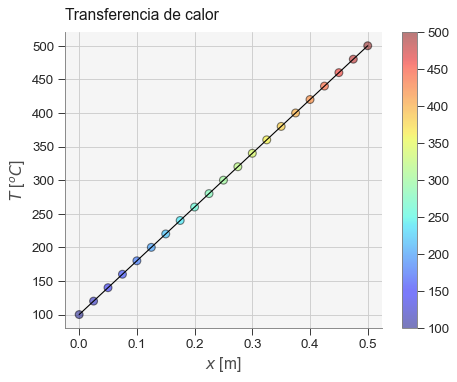

In [6]:
# Datos del problema
k = 1000
L = 0.5
TA = 100
TB = 500
q = 0
N = 21 # Número de puntos de la aproximación

# Arreglo para almacenar la solución numérica
T = np.zeros(N)

# Condiciones de frontera
T[0] = TA
T[-1] = TB

# Calculamos la temperatura con el método numérico
x = np.linspace(0, L, N)
T[1:-1] = resuelveDF(TA, TB, q, L, k, N)

# Definimos algunos parámetros para la gráfica
plt.title('Transferencia de calor')
plt.xlabel('$x$ [m]')
plt.ylabel('$T$ [$^oC$]')

# Realizamos la gráfica con una línea y puntos que tienen un color 
# dependiendo de su temperatura
plt.plot(x, T, color='k', lw=1.0)
s = plt.scatter(x, T, c=T, ec='black', s=50, vmin=100, vmax=500, cmap='jet', alpha=0.5)
plt.colorbar(s) # Se muestra una barra de color 
plt.show()



#### Aplicación al Ejemplo 2

In [ ]:
# Datos del problema
k = 0.5
L = 0.02
TA = 100
TB = 200
q = 1e+6
N = 21 # Número de puntos de la aproximación

# Arreglo para almacenar la solución numérica
T = np.zeros(N)

# Condiciones de frontera
T[0] = TA
T[-1] = TB

# Calculamos la temperatura con el método numérico
x = np.linspace(0, L, N)
T[1:-1] = resuelveDF(TA, TB, q, L, k, N)

# Definimos algunos parámetros para la gráfica
plt.title('Transferencia de calor')
plt.xlabel('$x$ [m]')
plt.ylabel('$T$ [$^oC$]')

# Realizamos la gráfica con una línea y puntos que tienen un color 
# dependiendo de su temperatura
plt.plot(x, T, color='k', lw=1.0)
s = plt.scatter(x, T, c=T, ec='black', s=50, cmap='jet', alpha=0.5)
plt.colorbar() # Se muestra una barra de color 
plt.show()

Observamos que en los dos ejemplos, las soluciones son similares a las obtenidas usando la solución analítica. Intente aumentar el número de puntos ($N$) de la aproximación y vea lo que sucede. Para evaluar la precisión del método, se propone al estudiante que calcule la norma del error entre solución analítica y la solución numérica.